In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read the dataset
data = pd.read_csv("/root/NDVI.csv")

# **INITIAL ANALYSIS**

In [6]:
# Calculate summary statistics for NDVI values in provinces with small population
small_population_stats = data[data['Type'] == 0]['NDVI'].describe()
# Calculate summary statistics for NDVI values in provinces with large population
large_population_stats = data[data['Type'] == 1]['NDVI'].describe()

In [24]:
# Find the top 5 NDVI values along with their corresponding province, population type, and year
top_5_small_population = data[data['Type'] == 0].nlargest(5, 'NDVI')
top_5_large_population = data[data['Type'] == 1].nlargest(5, 'NDVI')
# Find the bottom 5 NDVI values along with their corresponding province, population type, and year
bot_5_small_population = data[data['Type'] == 0].nsmallest(5, 'NDVI')
bot_5_large_population = data[data['Type'] == 1].nsmallest(5, 'NDVI')

In [25]:
#printing results
print("Summary statistics for provinces with small population:")
print(small_population_stats)
print("\nSummary statistics for provinces with large population:")
print(large_population_stats)
print("\nTop 5 NDVI values for provinces with small population:")
print(top_5_small_population[['Year', 'Province', 'Type', 'NDVI']])
print("\nTop 5 NDVI values for provinces with large population:")
print(top_5_large_population[['Year', 'Province', 'Type', 'NDVI']])
print("\nLowest 5 NDVI values for provinces with small population:")
print(bot_5_small_population[['Year', 'Province', 'Type', 'NDVI']])
print("\nLowest 5 NDVI values for provinces with large population:")
print(bot_5_large_population[['Year', 'Province', 'Type', 'NDVI']])

Summary statistics for provinces with small population:
count    120.000000
mean       0.643807
std        0.048018
min        0.538900
25%        0.606475
50%        0.644200
75%        0.690975
max        0.716900
Name: NDVI, dtype: float64

Summary statistics for provinces with large population:
count    120.000000
mean       0.578784
std        0.061079
min        0.445600
25%        0.532125
50%        0.583950
75%        0.625450
max        0.697600
Name: NDVI, dtype: float64

Top 5 NDVI values for provinces with small population:
    Year Province  Type    NDVI
21  2002   Quebec     0  0.7169
31  2003   Quebec     0  0.7160
71  2007   Quebec     0  0.7136
41  2004   Quebec     0  0.7103
51  2005   Quebec     0  0.7099

Top 5 NDVI values for provinces with large population:
    Year Province  Type    NDVI
0   2000   Quebec     1  0.6976
20  2002   Quebec     1  0.6707
40  2004   Quebec     1  0.6687
70  2007   Quebec     1  0.6679
60  2006   Quebec     1  0.6674

Lowest 5 NDVI va


1.   Quebec has the top 5 NDVI values in both large and small population areas throughout the years
2.   Alberta and Manitoba have shared the positions for lowest NDVI over the years



# **TREND ANALYSIS**

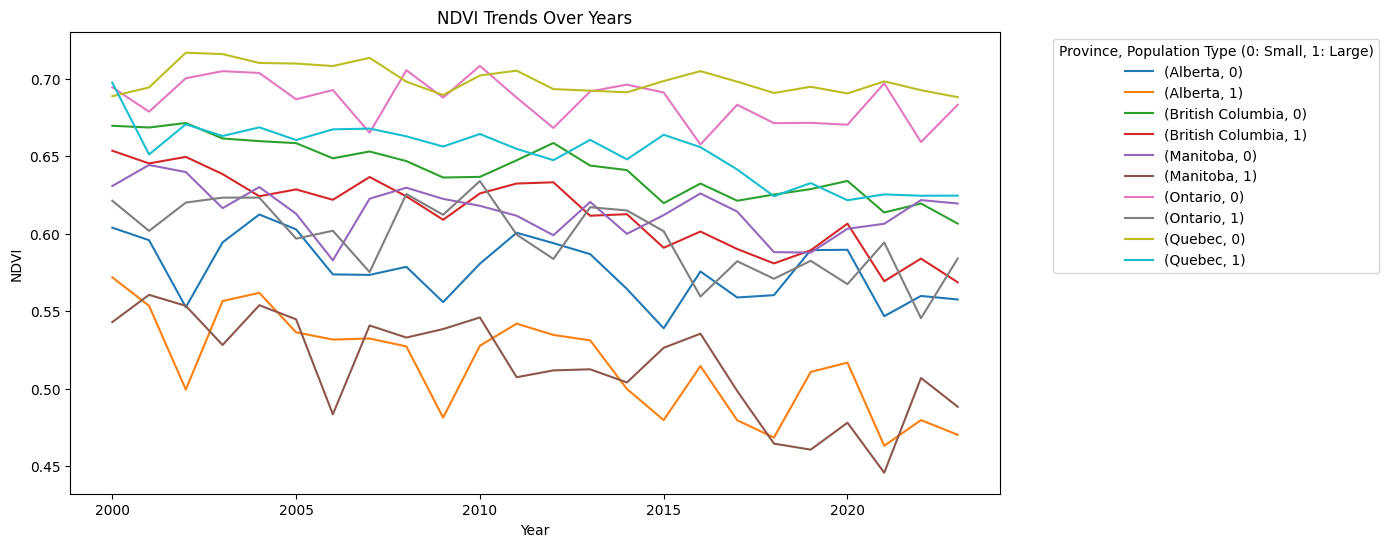

In [15]:
# Pivot the data to analyze NDVI trends over the years
pivot_table = data.pivot_table(values='NDVI', index='Year', columns=['Province', 'Type'])
colors = plt.cm.tab10.colors
# Plot NDVI trends for each province and population type
ax = pivot_table.plot(figsize=(12, 6), color=colors)
plt.title('NDVI Trends Over Years')
plt.xlabel('Year')
plt.ylabel('NDVI')
plt.legend(title='Province, Population Type (0: Small, 1: Large)', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

*   Small population areas in Quebec shown to have healthier and denser vegetation throughout the years.
*   Small population areas in Ontario have similar but slightly lower density of vegetation than Quebec, overtaking them for some period of time

*   Manitoba and Alberta have the lowest density of vegetation throughout the years
*   overall from 2000 to 2023 the vegetation has seen a decline in all provinces





# **COMPARISON**

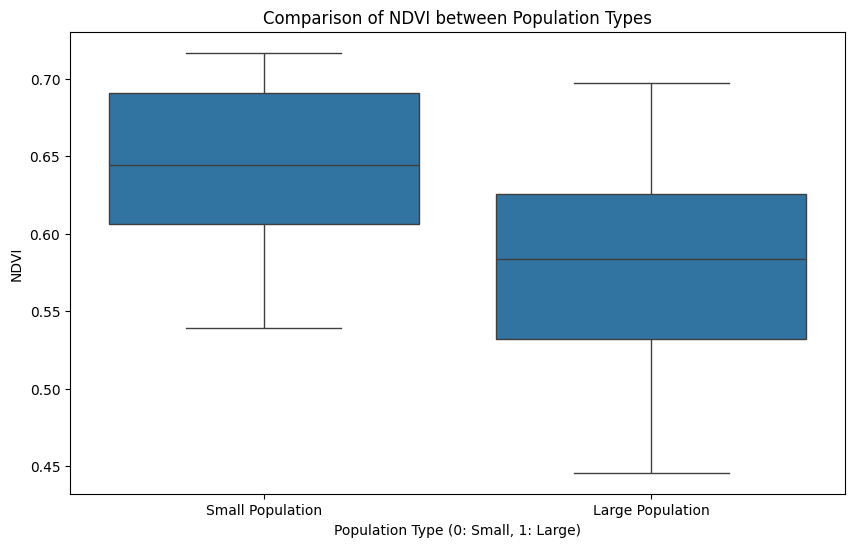

In [22]:
# Box plot comparison between provinces with small and large populations
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='NDVI', data=data)
plt.title('Comparison of NDVI between Population Types')
plt.xlabel('Population Type (0: Small, 1: Large)')
plt.ylabel('NDVI')
plt.xticks([0, 1], ['Small Population', 'Large Population'])
plt.show()

small population areas tend to have healthier and denser vegetation. This is because in urban areas due to higher population density, there is more vegetation area cleared for construction of roads, houses and other buildings.

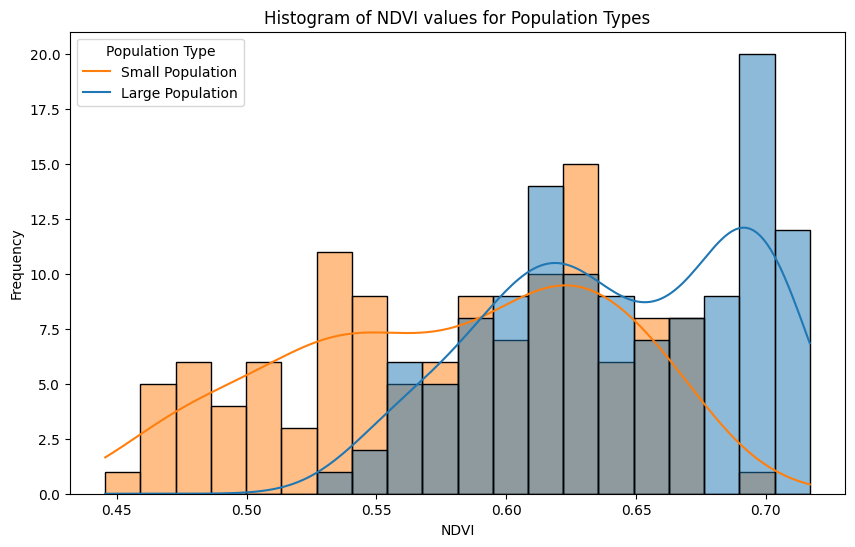

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='NDVI', hue='Type', bins=20, kde=True)
plt.title('Histogram of NDVI values for Population Types')
plt.xlabel('NDVI')
plt.ylabel('Frequency')
plt.legend(title='Population Type', labels=['Small Population', 'Large Population'])
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:186: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


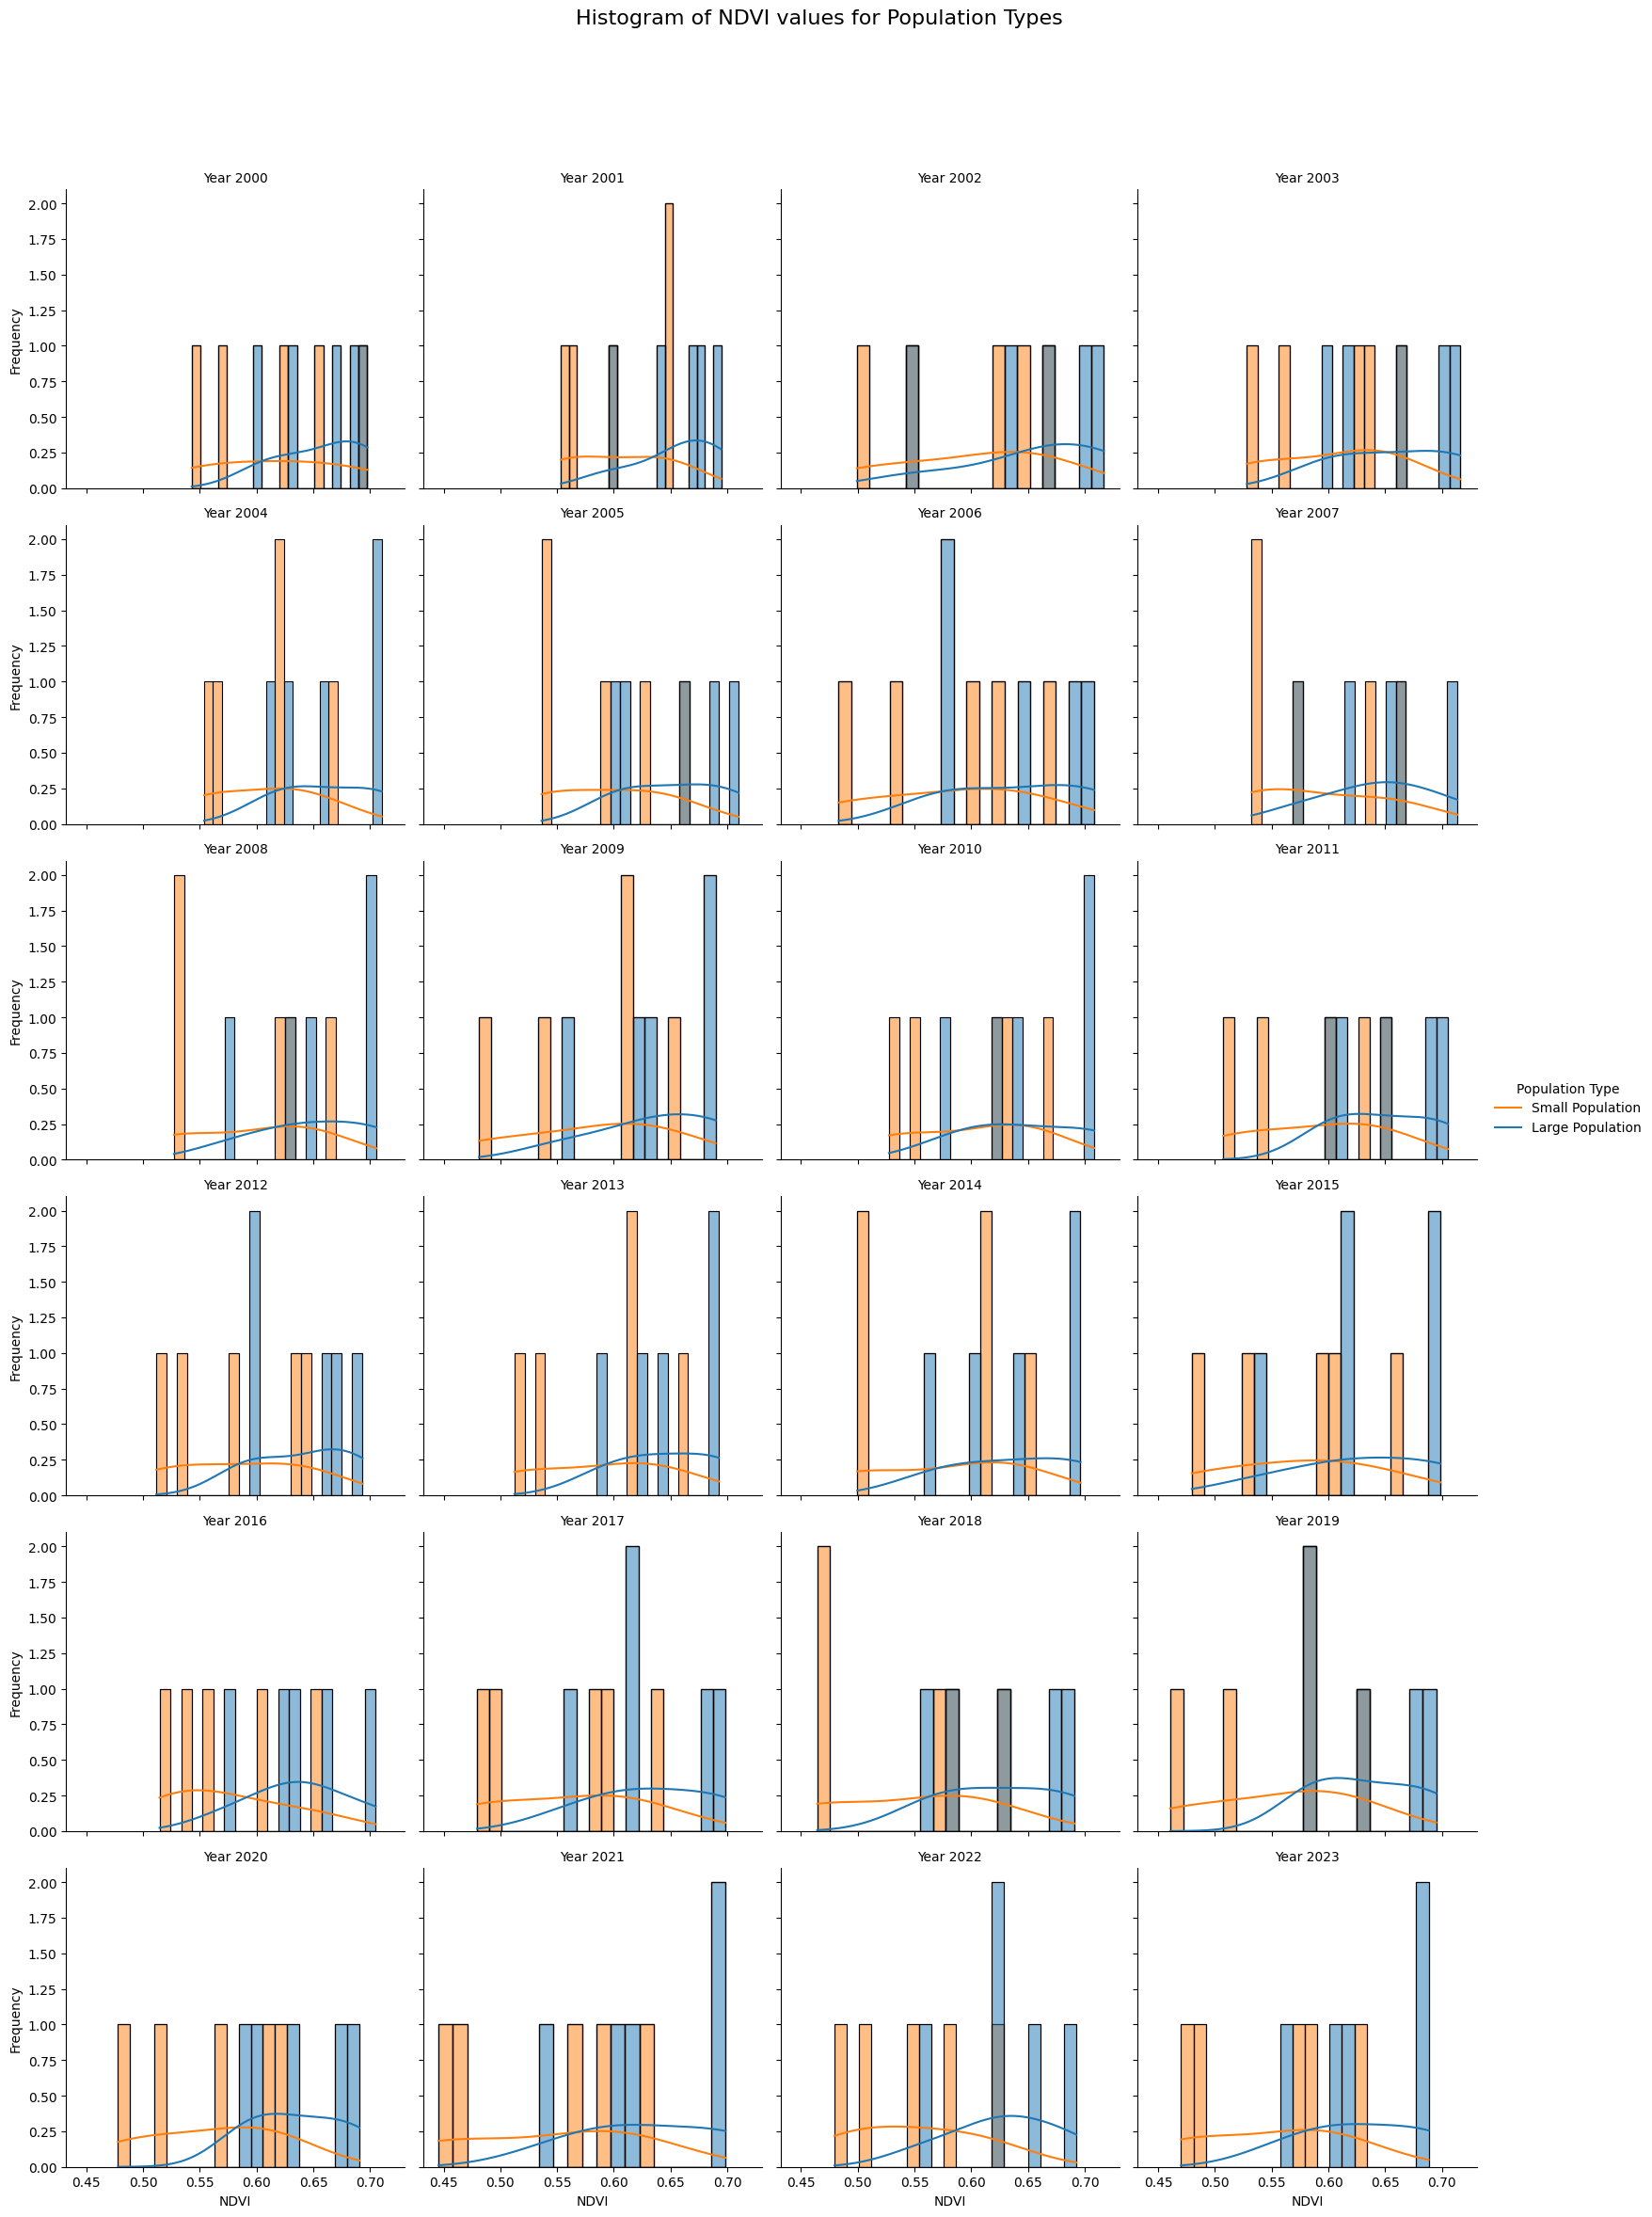

In [29]:
# Set up the facet grid
g = sns.FacetGrid(data, col="Year", col_wrap=4, height=4, sharex=True, sharey=True)

# Plot histograms for each year
g.map_dataframe(sns.histplot, x='NDVI', bins=20, hue='Type', kde=True)

# Add titles
g.set_titles("Year {col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Histogram of NDVI values for Population Types', fontsize=16)

# Set axis labels
g.set_axis_labels("NDVI", "Frequency")

# Add legend
g.add_legend(title='Population Type', labels=['Small Population', 'Large Population'])

plt.show()


1.   The trend lines for small and large population throughout the years intersect between 0.55 and 0.65 ndvi most of the time
2.   In the year 2018 there was a high number of small population areas that had just over 0.45 NDVI
3. In the year 2023 a high number of large population areas had over 0.65 NDVI



# **TIME SERIES NDVI PREDICTION FOR ONATRIO BOTH SMALL AND LARGE POPULATION AREAS**

In [36]:
from prophet import Prophet

province = 'Ontario'
population_type = 0  # Small Population: 0, Large Population: 1

# Filter data for the selected province and population type
subset_data = data[(data['Province'] == province) & (data['Type'] == population_type)]

# Prepare data for Prophet
df = subset_data[['Year', 'NDVI']].rename(columns={'Year': 'ds', 'NDVI': 'y'})

In [37]:
df['ds'] = pd.to_datetime(df['ds'], format='%Y')

In [39]:
# Initialize and fit Prophet model
model = Prophet()
model.fit(df)
# Make future predictions
last_year = df['ds'].max()
future = pd.date_range(start=last_year + pd.DateOffset(years=1), periods=12, freq='Y')
future = pd.DataFrame({'ds': future})
forecast = model.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq07x5d2z/8c_4mhf5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq07x5d2z/4t1seap4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38137', 'data', 'file=/tmp/tmpq07x5d2z/8c_4mhf5.json', 'init=/tmp/tmpq07x5d2z/4t1seap4.json', 'output', 'file=/tmp/tmpq07x5d2z/prophet_modeloyywtyfu/prophet_model-20240403012013.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:20:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:20:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:

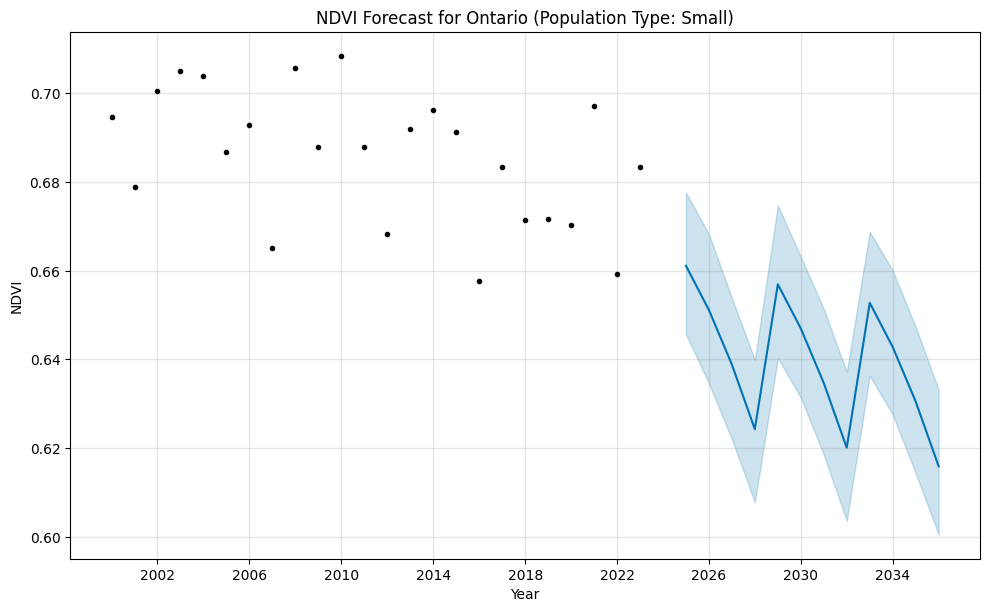

In [41]:
fig = model.plot(forecast)
plt.title(f'NDVI Forecast for Ontario (Population Type: Small)')
plt.xlabel('Year')
plt.ylabel('NDVI')
plt.show()

NDVI is predicted to gradually decrease while spiking in certain years in small population areas in Ontario by 2034 to 2036. All time low of 0.60

In [42]:
population_type = 1
subset_data2 = data[(data['Province'] == province) & (data['Type'] == population_type)]
df2 = subset_data2[['Year', 'NDVI']].rename(columns={'Year': 'ds', 'NDVI': 'y'})

In [43]:
df2['ds'] = pd.to_datetime(df2['ds'], format='%Y')

In [44]:
model2 = Prophet()
model2.fit(df2)
last_year = df2['ds'].max()
future2 = pd.date_range(start=last_year + pd.DateOffset(years=1), periods=12, freq='Y')
future2 = pd.DataFrame({'ds': future2})
forecast2 = model2.predict(future2)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq07x5d2z/na_i_jil.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq07x5d2z/g8pzyeeg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86527', 'data', 'file=/tmp/tmpq07x5d2z/na_i_jil.json', 'init=/tmp/tmpq07x5d2z/g8pzyeeg.json', 'output', 'file=/tmp/tmpq07x5d2z/prophet_model7q3v9ndc/prophet_model-20240403012522.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:25:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:25:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:

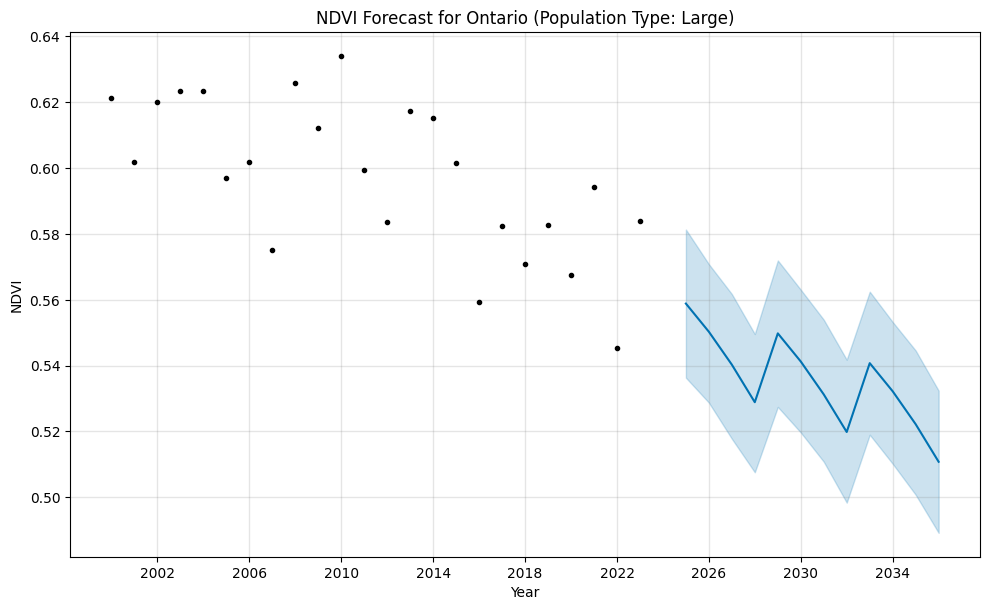

In [45]:
fig2 = model2.plot(forecast2)
plt.title(f'NDVI Forecast for Ontario (Population Type: Large)')
plt.xlabel('Year')
plt.ylabel('NDVI')
plt.show()

NDVI is predicted to gradually decrease while spiking in certain years in large population areas in Ontario by 2034 to 2036. All time low of 0.45